<a href="https://colab.research.google.com/github/Dennis-Kiarie/Hass-Consulting-Company-House-Cost-Prediction/blob/main/Moringa_Data_Science_Core_W7_Independent_Project_2021_Dennis_Kiarie_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question

**a. Specifying the question**

To design a model that will predict the cost of a house, based on real estate properties information collected over few months.

**b. Defining Metric of Success**

The project will be considered a success if the models created are able to predict the cost of a house to an accuracy between 70-80%

**c. Understanding the context**

HassConsult Limited was formed in 1992 with a vision to establish a comprehensive Real Estate firm that reinvented the market patterns by introducing transparency, integrity and professionalism in a market calling for more global standards.

As a policy, HassConsult works towards new innovations and continually brings dynamism to the industry in Kenya-be it launch of off-plan developments or introduction of versatile financial structures for property developments, which have propelled the industry into new directions.

**d. Recording Experimental Design**

In this study, we will be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables.
We will also perform regression analysis and modelling using regression techniques i.e Multiple Linear Regression, Quantile Regression, Ridge Regression
, Lasso Regression and Elastic Net Regression to get the appropriate model.

**e. Data Relevance**

We will be using data extracted from the Real Estate Information. The dataset to use for this project can be found by following this link:
 
http://bit.ly/IndependentProjectWeek7Dataset 

Below is the dataset glossary:

Id, price - Price of the house, bedrooms - Number of Bedrooms,bathrooms - Number of Bathrooms, sqft_living - Square feet area of living area, sqft_lot - Square feet area of parking Layout, floors - Number of Floors, waterfront - Whether waterfront is there or not, view - Number of Views,grade - Grades, sqft_above, sqft_basement - Square feet area off basement, yr_built - Year the house is built,yr_renovated - Year the house is renovated, zipcode - zipcode os the house, lat : Latitude of the house, lon : Longitude of the house, sqft_living15 and sqft_lot15


# 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 3. Read the data

In [2]:
#load the data from Fifa ranking dataset
housing = pd.read_csv('/content/Independent Project Week 7 - house_data.csv', sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)

#preview the data
housing

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#4.  Checking the data

In [3]:
#Determine the number of Records in our dataset
#
print("The rows and columns for the ranking dataset: ",housing.shape)

The rows and columns for the ranking dataset:  (21613, 20)


In [4]:
# Checking whether each column has an appropriate datatype
#
print("Datatypes for ranking dataset: ")
print(housing.dtypes)
print("*****************")

Datatypes for ranking dataset: 
id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
*****************


In [5]:
#Previewing the top of housing dataset
#
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#previewing the bottom of housing dataset
housing.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


# 5.External Data Source Validation

#6. Tidying the dataset

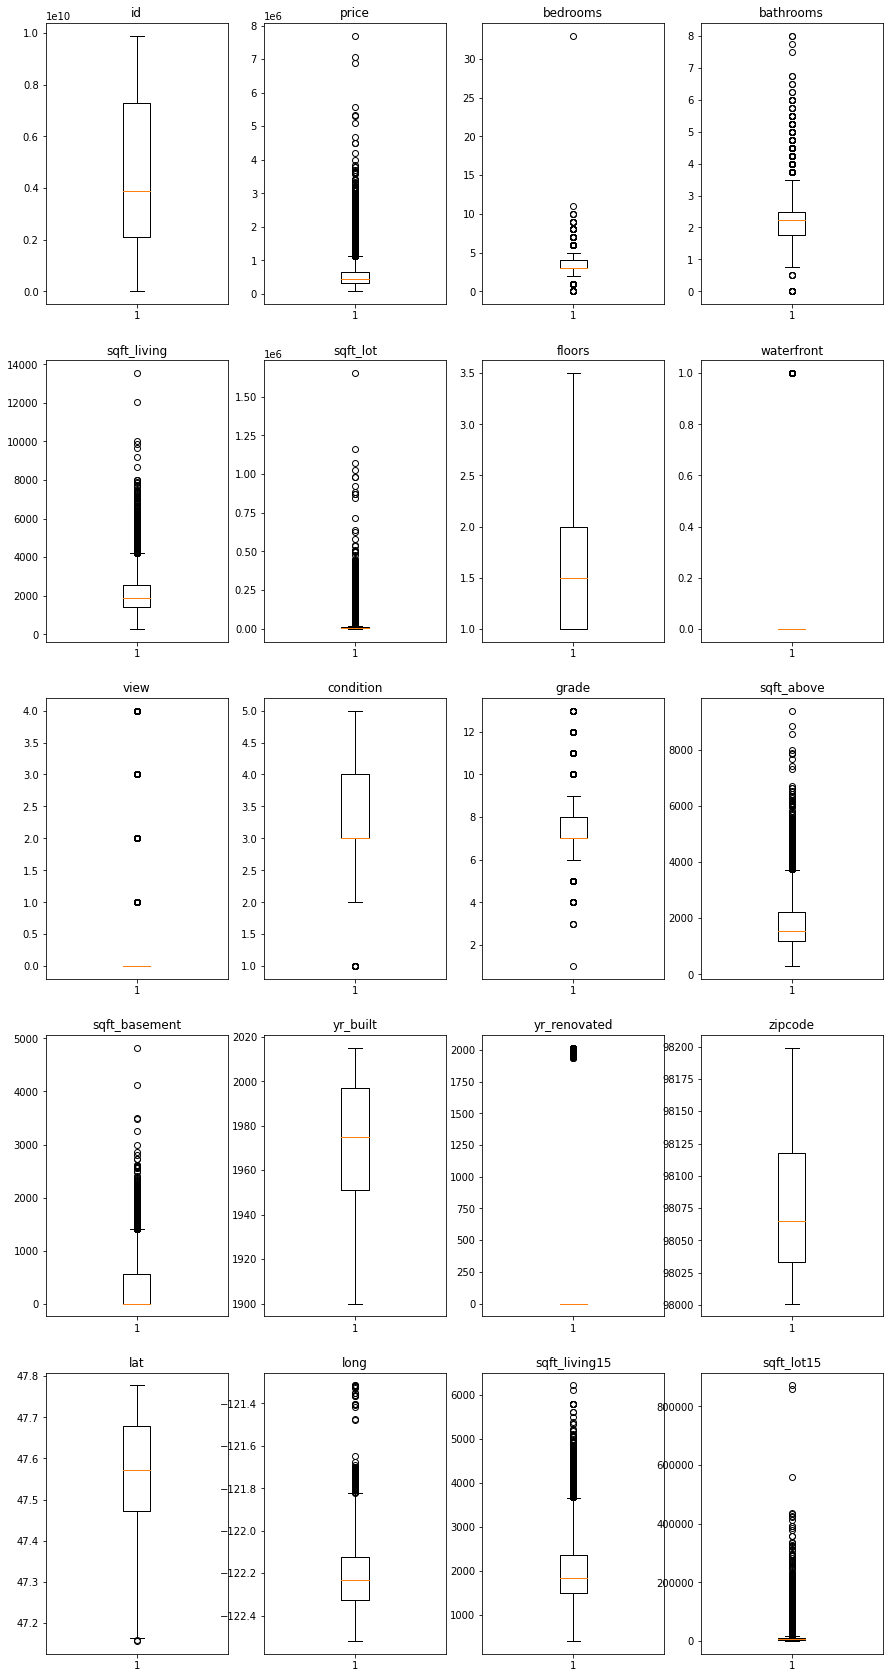

In [7]:
# Checking for Outliers
 
# we save the column names onto a dictionary
columns_dict = {'id': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'waterfront': 8, 'view': 9, 'condition': 10, 'grade': 11, 'sqft_above': 12,
       'sqft_basement': 13, 'yr_built': 14, 'yr_renovated':15, 'zipcode': 16, 'lat': 17, 'long': 18,
       'sqft_living15': 19, 'sqft_lot15': 20}

plt.figure(figsize=(15,30))

# we make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(housing[variable])
  plt.title(variable)

plt.show()

In [8]:
#checking for anomalies

#Checking outliers

# quantiles
Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
# 
df_housing= housing[~((housing < (Q1 - 1.5 * IQR)) | (housing > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# 
print('The shape of our new dataset is :',df_housing.shape)

# Printing the shape of our old dataset
#
print('The shape of our old dataset is :',housing.shape)

The shape of our new dataset is : (14931, 20)
The shape of our old dataset is : (21613, 20)


In [9]:
#check for duplicates
df_housing.duplicated().sum()

2

In [10]:
# Drop all duplicates
df_housing.drop_duplicates(inplace=True)
#

#preview 
df_housing.duplicated().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

In [11]:
# Check for unique values in each column
for col in df_housing.columns.to_list():
  print(f'{col} column unique values: \n')
  print(df_housing[col].unique(), end='\n')
  print('**********')
  print('\n')

id column unique values: 

[7129300520 5631500400 2487200875 ... 1523300141  291310100 1523300157]
**********


price column unique values: 

[221900. 180000. 604000. ... 507250. 610685. 402101.]
**********


bedrooms column unique values: 

[3 2 4 5]
**********


bathrooms column unique values: 

[1.   3.   2.   2.25 1.5  2.5  1.75 2.75 3.25 3.5  0.75 1.25]
**********


sqft_living column unique values: 

[1180  770 1960 1680 1715 1060 1780 1890 1160 1370 1810 1600 1200 1250
 1620 2270 1070 2450 1710 1400 1520 2570 2320 1190 2330 1090 2060 2360
 1220 2620 3595 1570 1280 3160  990 2290 1410 1980 2730 2830 2250 2420
 1850 1260 2519 1540 1660 2770 2240 1000 2750 2380 1760 1040 2350 1900
 2020  960 2140 2660 1610 1030 1580 2070 2340 1670 1240 2030 2310 1590
  880 1450 2100 2910 2160 2010 2590 1170 1110 2820 2550 1430 1360 2640
 1910 2680 1340 1120 1970 1350 2440 1050 3130 1490 1330 2230 1650 2180
 1690 2150  860 1940 1010 1300  910 2480  900 1550 1270 1720  850 1320
 1750 2220 1510 1480 2

In [12]:
#checking for missing values
df_housing.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
# More data cleaning procedures
#
#checking datatypes
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14929 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14929 non-null  int64  
 1   price          14929 non-null  float64
 2   bedrooms       14929 non-null  int64  
 3   bathrooms      14929 non-null  float64
 4   sqft_living    14929 non-null  int64  
 5   sqft_lot       14929 non-null  int64  
 6   floors         14929 non-null  float64
 7   waterfront     14929 non-null  int64  
 8   view           14929 non-null  int64  
 9   condition      14929 non-null  int64  
 10  grade          14929 non-null  int64  
 11  sqft_above     14929 non-null  int64  
 12  sqft_basement  14929 non-null  int64  
 13  yr_built       14929 non-null  int64  
 14  yr_renovated   14929 non-null  int64  
 15  zipcode        14929 non-null  int64  
 16  lat            14929 non-null  float64
 17  long           14929 non-null  float64
 18  sqft_l

In [14]:
# Replacing values in waterfront with a yes and no
df_housing = df_housing.replace({'waterfront': {0 :'no', 1 :'yes'}})

#preview the column for waterfront
df_housing['waterfront'].head()

0    no
2    no
3    no
4    no
6    no
Name: waterfront, dtype: object

In [15]:
# converting zipcode to string datatype
df_housing['zipcode'] = df_housing['zipcode'].astype(str)

#check datatype for column zipcode
df_housing['zipcode'].dtype


dtype('O')

In [16]:
# converting variables from float to int 
df_housing['bathrooms'] = df_housing['bathrooms'].astype(int)
df_housing['floors'] = df_housing['floors'].astype(int)

#check datatype for column zipcode and bathrooms
df_housing[['bathrooms','floors']].dtypes 


bathrooms    int64
floors       int64
dtype: object

In [17]:
# converting year to datetime
df_housing['yr_built'] = pd.to_datetime(df_housing['yr_built'])
df_housing['yr_renovated'] = pd.to_datetime(df_housing['yr_renovated'])

#check for datatype in columns for yr_built and yr_removed
df_housing[['yr_built','yr_renovated']].dtypes


yr_built        datetime64[ns]
yr_renovated    datetime64[ns]
dtype: object

In [75]:
# dropping unnecessary columns
df2_housing = df_housing.drop(['id','yr_built', 'grade', 'yr_renovated', 'waterfront', 'view', 'condition', 'sqft_living15', 'sqft_basement', 'sqft_lot15'], axis = 1)

#preview the dataset
df2_housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long
0,221900.0,3,1,1180,5650,1,1180,98178,47.5112,-122.257
2,180000.0,2,1,770,10000,1,770,98028,47.7379,-122.233
3,604000.0,4,3,1960,5000,1,1050,98136,47.5208,-122.393
4,510000.0,3,2,1680,8080,1,1680,98074,47.6168,-122.045
6,257500.0,3,2,1715,6819,2,1715,98003,47.3097,-122.327


In [42]:
#Rename the column names

df2_housing=df_housing.rename(columns = {'lat': 'Latitude','long':'longitude'},inplace = False)

#Preview the dataset columns
df2_housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'Latitude',
       'longitude', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [37]:
#check for info in our dataset
df2_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14929 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             14929 non-null  int64         
 1   price          14929 non-null  float64       
 2   bedrooms       14929 non-null  int64         
 3   bathrooms      14929 non-null  int64         
 4   sqft_living    14929 non-null  int64         
 5   sqft_lot       14929 non-null  int64         
 6   floors         14929 non-null  int64         
 7   waterfront     14929 non-null  object        
 8   view           14929 non-null  int64         
 9   condition      14929 non-null  int64         
 10  grade          14929 non-null  int64         
 11  sqft_above     14929 non-null  int64         
 12  sqft_basement  14929 non-null  int64         
 13  yr_built       14929 non-null  datetime64[ns]
 14  yr_renovated   14929 non-null  datetime64[ns]
 15  zipcode        1492

Our housing dataset has no null values, outliers, duplicates and the datatypes are also appropriate hence no more data cleaning required, we therefore move to Exploratory Data Analysis

#7. Exploratory Data Analysis

a. **Univariate Analysis**

In [21]:
#Describe numerical variables
#
df_housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,1.492900e+04,1.492900e+04,14929.000000,14929.000000,14929.000000,14929.000000,14929.000000,14929.0,14929.000000,14929.000000,14929.000000,14929.000000,14929.000000,14929.000000,14929.00000,14929.000000
mean,4.728871e+09,4.383804e+05,3.261973,1.615312,1813.964767,6988.974077,1.425079,0.0,3.420323,7.379932,1584.982316,228.982450,47.558872,-122.230154,1796.61203,6868.215420
std,2.851665e+09,1.800777e+05,0.772849,0.592905,614.606988,3355.933033,0.559942,0.0,0.647128,0.804805,601.417755,353.245198,0.142108,0.123705,507.21011,2987.955942
min,2.800031e+06,8.200000e+04,2.000000,0.000000,560.000000,520.000000,1.000000,0.0,2.000000,6.000000,480.000000,0.000000,47.189500,-122.472000,620.00000,651.000000
25%,2.321300e+09,3.000000e+05,3.000000,1.000000,1350.000000,4690.000000,1.000000,0.0,3.000000,7.000000,1140.000000,0.000000,47.457500,-122.333000,1430.00000,4800.000000
50%,4.037800e+09,4.050000e+05,3.000000,2.000000,1740.000000,7020.000000,1.000000,0.0,3.000000,7.000000,1430.000000,0.000000,47.569700,-122.264000,1710.00000,7172.000000
75%,7.454000e+09,5.470000e+05,4.000000,2.000000,2210.000000,8925.000000,2.000000,0.0,4.000000,8.000000,1910.000000,450.000000,47.683500,-122.153000,2090.00000,8650.000000
max,9.900000e+09,1.120000e+06,5.000000,3.000000,4200.000000,19141.000000,3.000000,0.0,5.000000,9.000000,3740.000000,1400.000000,47.777600,-121.821000,3640.00000,17550.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1ed363590>,
      dtype=object)

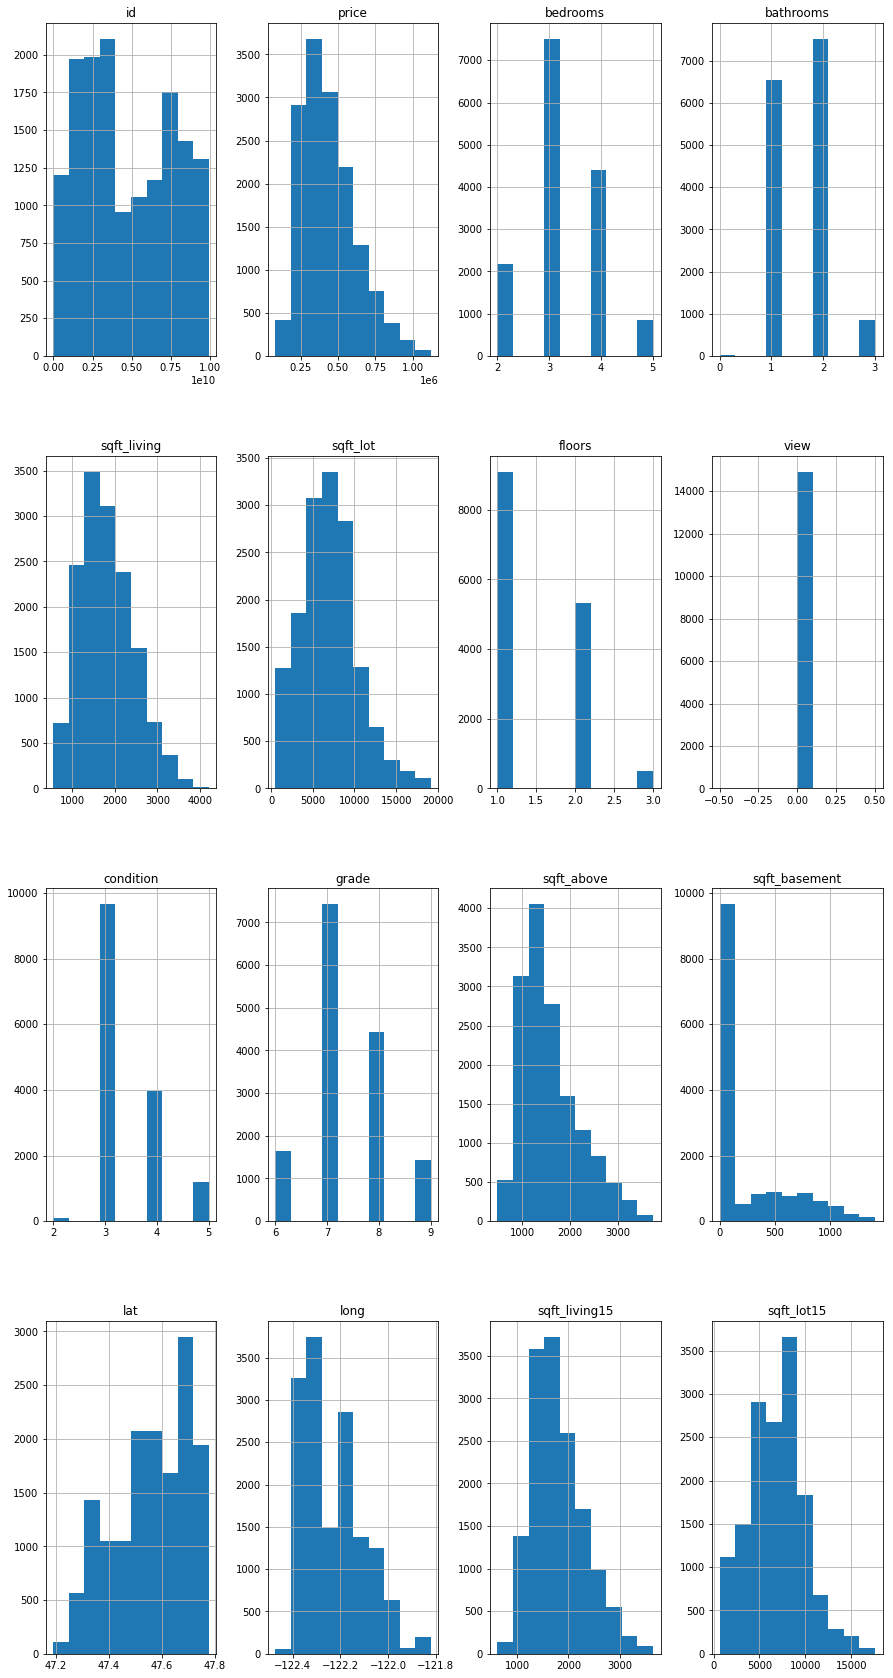

In [22]:
#we check for data distribution
df_housing.hist(bins=10, figsize=[15,30])

Our data doesnot follow the Gaussian distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

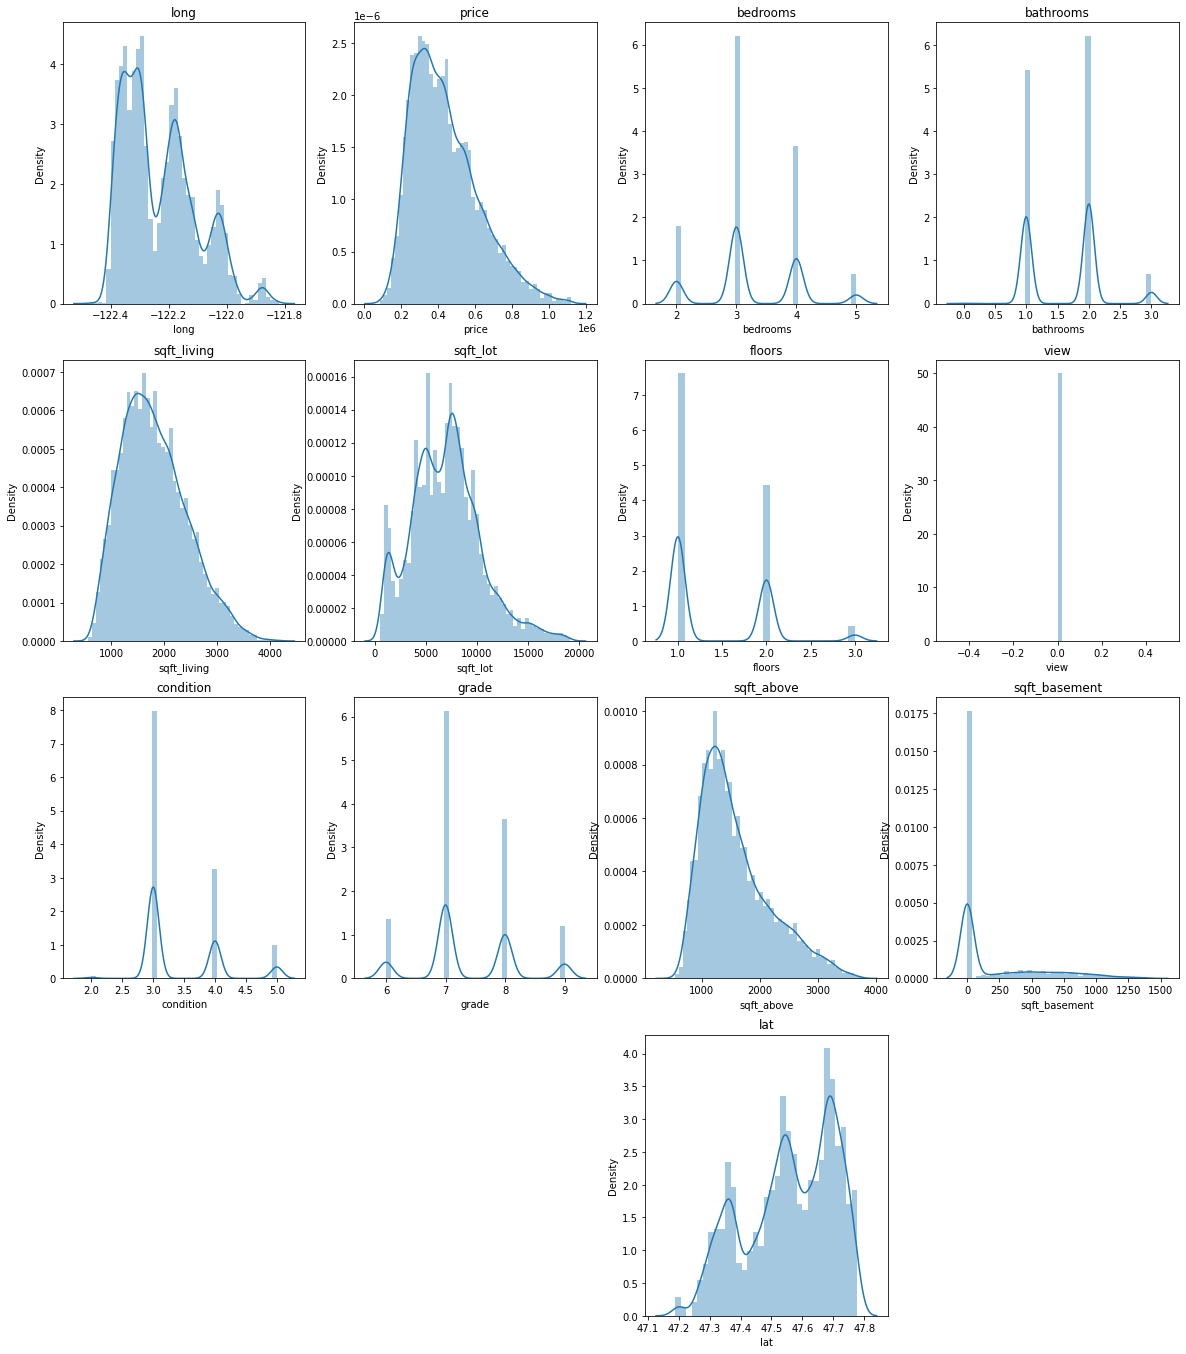

In [23]:
# plot histograms for all numeric columns
# save the column names onto a dictionary
columns_dict = {'long': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'view': 8, 'condition': 9, 'grade': 10, 'sqft_above': 11,
       'sqft_basement': 12, 'lat': 15}
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df_housing[variable])
  plt.title(variable)

plt.show()

Numerical column values are skewed to the right indicating that most values lie in the upper range

**b. Bivariate Analysis**

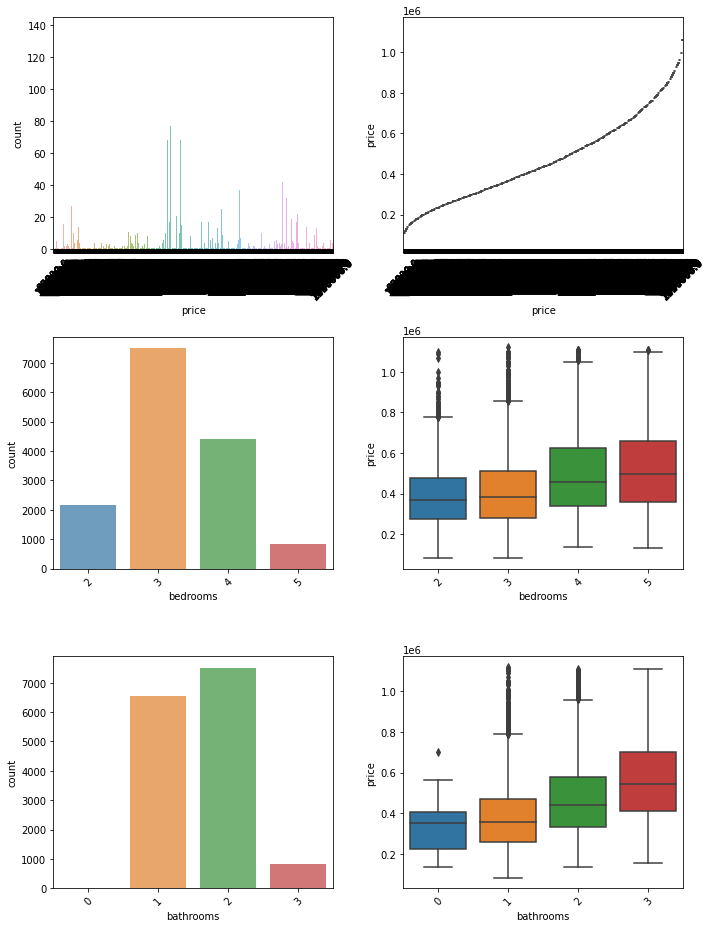

In [49]:
#Categoric Feature Analysis
# Boxplot gives a good idea about how the Price is distributed across the categories.
# Distribution charts show how well each category is populated.
c = 0
len_c = 3
fig, axes = plt.subplots(len_c, 2, figsize=(10, 13))
for i, ax in enumerate(fig.axes):
    if (c < len_c) & (i % 2 == 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df2_housing.columns[c], alpha=0.7, data=df2_housing, ax=ax)

    if (c < len_c) & (i % 2 != 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = df2_housing, x=df2_housing.columns[c], y='price', ax=ax)
        c = c + 1
fig.tight_layout()

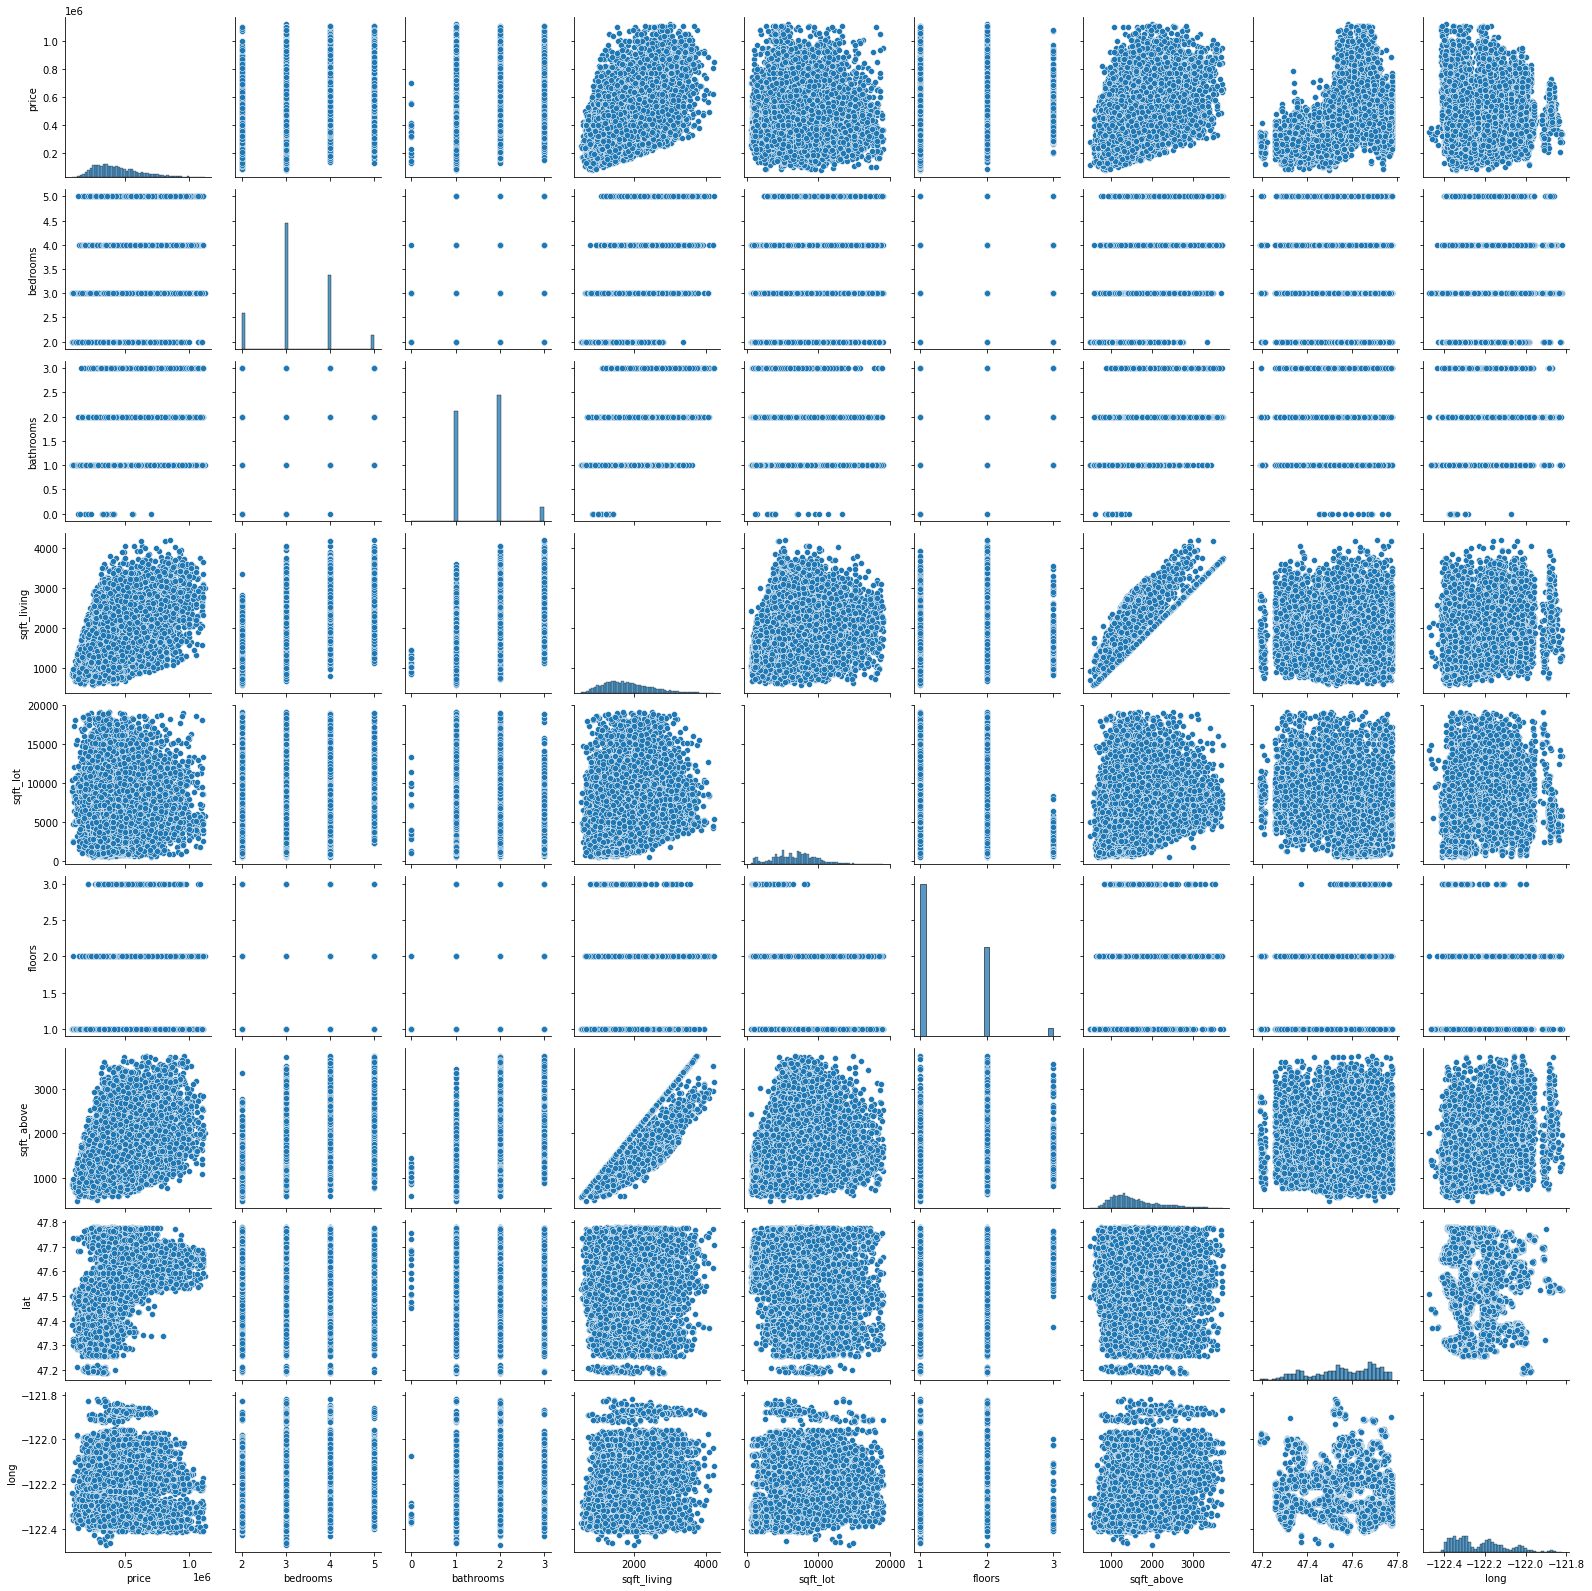

In [52]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df2_housing)
plt.show()

In [71]:
#Tabulating the correlation coefficients
corr = df2_housing.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long
price,1.000000,0.239258,0.291176,0.514444,-0.085447,0.190759,0.408100,0.491019,0.049336
bedrooms,0.239258,1.000000,0.372568,0.614655,0.205066,0.102710,0.485901,-0.082265,0.191246
bathrooms,0.291176,0.372568,1.000000,0.563923,-0.118819,0.513970,0.515704,-0.043261,0.243668
sqft_living,0.514444,0.614655,0.563923,1.000000,0.164817,0.317393,0.831444,-0.027354,0.314021
sqft_lot,-0.085447,0.205066,-0.118819,0.164817,1.000000,-0.382417,0.114763,-0.142251,0.222299
floors,0.190759,0.102710,0.513970,0.317393,-0.382417,1.000000,0.513715,-0.014165,0.187380
sqft_above,0.408100,0.485901,0.515704,0.831444,0.114763,0.513715,1.000000,-0.103868,0.426214
lat,0.491019,-0.082265,-0.043261,-0.027354,-0.142251,-0.014165,-0.103868,1.000000,-0.161884
long,0.049336,0.191246,0.243668,0.314021,0.222299,0.187380,0.426214,-0.161884,1.000000


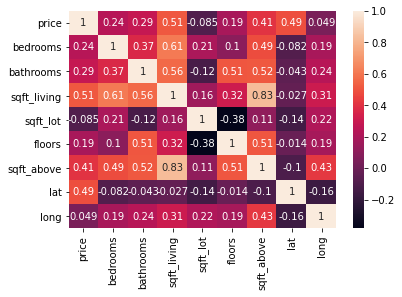

In [50]:
#correlation heat map
sns.heatmap(df2_housing.corr(),annot=True)
plt.show()

**c. Multivariate Analysis**

In [77]:
# Preprocessing
x=df2_housing[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'zipcode', 'lat', 'long']]
y=df2_housing['price']

In [70]:
#Import linear Doscriminant analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#create an instance of LDA
lda=LDA()
lda_=lda.fit(x,y)
lda_x=lda_.transform(x)
lda_.coef_

array([[ 0.00000000e+00,  1.30248350e+00, -7.96802327e-03, ...,
         3.43423830e-02, -1.87067107e+01, -4.45402390e-01],
       [ 0.00000000e+00, -1.50074294e+00, -1.81124353e-01, ...,
        -1.69140211e-02, -2.47521852e+01, -3.13583863e+00],
       [ 0.00000000e+00,  1.22052508e+00, -5.09714160e-01, ...,
        -3.00171492e-02, -2.93308963e+01, -1.50773930e+01],
       ...,
       [ 0.00000000e+00, -7.51833394e-01,  1.02088299e+00, ...,
        -8.67093489e-03,  1.30820386e+01, -6.90164046e+00],
       [ 0.00000000e+00,  3.81958370e-01,  5.59927181e-01, ...,
        -9.27127538e-03,  1.72456228e+01, -1.02108596e+01],
       [ 0.00000000e+00, -2.88337276e+00, -6.90513079e+00, ...,
        -7.52369537e-03,  7.58048360e+00, -1.35872597e+01]])

In [78]:
#creating a dataframe to get the name of the columns
df3_housing=pd.DataFrame(index=x.columns.values,data=lda_.coef_[0].T)
df3_housing.sort_values(0,ascending=False)

,0
bedrooms,1.302483
floors,1.207939
zipcode,0.034342
sqft_lot,0.000688
sqft_above,0.000238
price,0.000000
sqft_living,-0.006965
bathrooms,-0.007968
long,-0.445402
lat,-18.706711



From our analysis,it is safe to conclude that we can use a linear combination of the following features to comfortably predict the sell price of a house.

*   bedrooms
*   floors
*   zipcode
*   sqft_lot
*   sqft_above
*   sqft_living
*   bathrooms
*   longitude
*   Latitude


In [79]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df2_housing)
chi_square_value, p_value

(60719.85204736524, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix

# 8. Feature Engineering

#9.Implementing the solution

**Checking for Multi_collinearlity**

In [93]:
# Let's display the correlations between the variables
corr = df2_housing[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'zipcode', 'lat', 'long']].corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long
price,1.000000,0.239258,0.291176,0.514444,-0.085447,0.190759,0.408100,0.491019,0.049336
bedrooms,0.239258,1.000000,0.372568,0.614655,0.205066,0.102710,0.485901,-0.082265,0.191246
bathrooms,0.291176,0.372568,1.000000,0.563923,-0.118819,0.513970,0.515704,-0.043261,0.243668
sqft_living,0.514444,0.614655,0.563923,1.000000,0.164817,0.317393,0.831444,-0.027354,0.314021
sqft_lot,-0.085447,0.205066,-0.118819,0.164817,1.000000,-0.382417,0.114763,-0.142251,0.222299
floors,0.190759,0.102710,0.513970,0.317393,-0.382417,1.000000,0.513715,-0.014165,0.187380
sqft_above,0.408100,0.485901,0.515704,0.831444,0.114763,0.513715,1.000000,-0.103868,0.426214
lat,0.491019,-0.082265,-0.043261,-0.027354,-0.142251,-0.014165,-0.103868,1.000000,-0.161884
long,0.049336,0.191246,0.243668,0.314021,0.222299,0.187380,0.426214,-0.161884,1.000000


The table above assist us to know how variables are related to one another.The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. 
We use these correlations to compute the VIF(Variance Inflation Factor) score for each variable and create a new dataframe with the inverse of the matrix above.

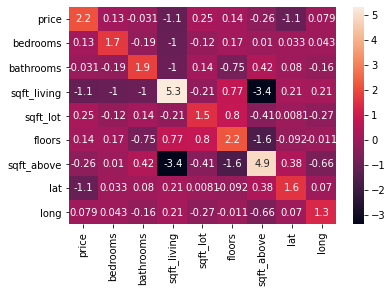

In [94]:
#computing the VIF(which is the inverse of the correlation matrix)
VIF_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
sns.heatmap(VIF_df, annot = True)
plt.show()

The heat map above shows VIF values that are very close to 0 meaning that there is very little multi-collinearity


#9. Regression Analysis

In [102]:
#Import libaries
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn import metrics

In [104]:
# preview the first 10 records of our dataset
df2_housing.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long
0,221900.0,3,1,1180,5650,1,1180,98178,47.5112,-122.257
2,180000.0,2,1,770,10000,1,770,98028,47.7379,-122.233
3,604000.0,4,3,1960,5000,1,1050,98136,47.5208,-122.393
4,510000.0,3,2,1680,8080,1,1680,98074,47.6168,-122.045
6,257500.0,3,2,1715,6819,2,1715,98003,47.3097,-122.327
7,291850.0,3,1,1060,9711,1,1060,98198,47.4095,-122.315
8,229500.0,3,1,1780,7470,1,1050,98146,47.5123,-122.337
9,323000.0,3,2,1890,6560,2,1890,98038,47.3684,-122.031
11,468000.0,2,1,1160,6000,1,860,98115,47.6900,-122.292
13,400000.0,3,1,1370,9680,1,1370,98074,47.6127,-122.045


In [98]:
#Residual plots and heteroskedasticity testing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df2_housing.values
y = df2_housing['price'].values

X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.4, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, price_train)

# This is our prediction for admission based on our model
price_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-5.4606232462776484e-11

*we check the appripriateness of the model using a residual plot*

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

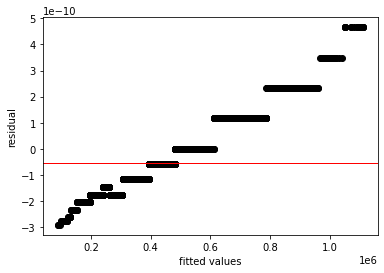

In [101]:
# Residual plot
import matplotlib.pyplot as plt
plt.scatter(price_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [103]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


**a. Multiple Linear Regression**

In [112]:
#separating independent and dependent variable
X = df2_housing.iloc[:,1:-1].values
y = df2_housing.iloc[:,-1] .values

In [119]:
#splitting dataset into training and testing dataset
#Train using 80% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [180]:
# Fitting Multiple Linear Regression to the Training set
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Creating a baseline regression model
first_model = (mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print("Mean Squared Error is:" ,first_model)

Mean Squared Error is: 0.008867044635401654


In [123]:
#Regression intercept
regressor.intercept_

-13.513363384559298

In [124]:
#Regression coeefficient
regressor.coef_

array([-6.30815341e-03,  1.34774614e-02, -2.55723257e-05,  3.49240413e-06,
       -1.09287483e-03,  7.56284438e-05, -1.12113970e-03,  2.41087640e-02])

In [129]:
for i in range(4):
    print(regressor.coef_[i])

-0.006308153414594656
0.013477461423735675
-2.5572325705920315e-05
3.4924041272012263e-06


In [130]:
# comparing the predicted and actual data
#We can compare y_pred and y_test to find its accuracy
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,4479.000000,4479.000000
mean,-122.229520,-122.230238
std,0.123311,0.081248
min,-122.464000,-122.429628
25%,-122.333000,-122.301884
50%,-122.262000,-122.215165
75%,-122.151000,-122.163428
max,-121.821000,-122.034308


In [131]:
# Predicting the Test set results
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0716442057685846
Mean Squared Error: 0.00890193324527792
Root Mean Squared Error: 0.09435005694369199


In [132]:
# Root mean squared error for X-train
rmse=np.sqrt(mean_squared_error(y_train,regressor.predict(X_train)))
rmse

0.09408762407574776

In [133]:
#Regressor score
regressor.score(X_train,y_train)

0.4230819968962195


*We perform cross validation to check for overfitting or underfitting*


In [185]:
# performing cross validation of 10 folds
from sklearn.model_selection import cross_val_score
np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()


0.09310480800082588

In [187]:
# Performing cross validation of 10 folds
#
scores = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 0.009
Standard deviation of the cross validation scores is 0.001


In [136]:
# Finding the random states
for i in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= i)
    a=np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()
    b=np.sqrt(mean_squared_error(y_test,regressor.predict(X_test)))
    if(abs(a-b)<1):
        print(abs(a-b))
        print("RandomState: "+"{}".format(i))

7.081445818234167e-05
RandomState: 0
1.4880149473650572e-05
RandomState: 1
8.775627171604683e-05
RandomState: 2
9.748825037127207e-05
RandomState: 3
0.00019285534272124594
RandomState: 4
5.653775941436012e-05
RandomState: 5
5.040480126856928e-05
RandomState: 6
0.00014149825948323036
RandomState: 7
0.00013591948529190212
RandomState: 8
0.00018279831896761412
RandomState: 9
0.00029869361041201525
RandomState: 10
6.967745907590639e-05
RandomState: 11
0.00018070620123800119
RandomState: 12
5.460822725873726e-05
RandomState: 13
2.3762712379568618e-05
RandomState: 14
5.1550509483577756e-05
RandomState: 15
3.273822752396238e-05
RandomState: 16
0.000244013824423725
RandomState: 17
6.454143330476836e-05
RandomState: 18
0.0001051391558083703
RandomState: 19
0.00014978124956088745
RandomState: 20
5.273075159564766e-05
RandomState: 21
2.5002692174022623e-05
RandomState: 22
0.0002061842908630679
RandomState: 23
7.955423651077875e-05
RandomState: 24
0.0001780483750175449
RandomState: 25
2.8547960175

**b. Quantile Regression**

In [137]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [151]:
#Preview the base model
print('Baseline of regression model is :' ,first_model)

Baseline of regression model is : 0.008867317670285398


In [189]:
# Finding the regression coefficients for the conditioned median, 0.25 quantile
#
mod = smf.quantreg('price ~ bedrooms', df2_housing)
res = mod.fit(q=.25)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.01964
Model:                       QuantReg   Bandwidth:                   3.104e+04
Method:                 Least Squares   Sparsity:                    3.951e+05
Date:                Fri, 23 Jul 2021   No. Observations:                14929
Time:                        12:31:19   Df Residuals:                    14927
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.76e+05   5916.796     29.746      0.000    1.64e+05    1.88e+05
bedrooms      3.8e+04   1762.254     21.563      0.000    3.45e+04    4.15e+04


our intercept is 1.76e+05 and our slope or the coefficient for our x is  3.8e+04 . 


In [178]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms', df2_housing)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.02026
Model:                       QuantReg   Bandwidth:                   3.568e+04
Method:                 Least Squares   Sparsity:                    4.602e+05
Date:                Fri, 23 Jul 2021   No. Observations:                14929
Time:                        11:03:52   Df Residuals:                    14927
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.55e+05   8168.196     31.219      0.000    2.39e+05    2.71e+05
bedrooms     4.75e+04   2436.615     19.494      0.000    4.27e+04    5.23e+04


our intercept is 2.55e+05 and our slope or the coefficient for our x is  4.75e+04. 


In [190]:
# Finding the regression coefficients for the conditioned median, 0.75 quantile
#
mod = smf.quantreg('price ~ bedrooms', df2_housing)
res = mod.fit(q=.75)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.03889
Model:                       QuantReg   Bandwidth:                   3.104e+04
Method:                 Least Squares   Sparsity:                    6.672e+05
Date:                Fri, 23 Jul 2021   No. Observations:                14929
Time:                        12:31:58   Df Residuals:                    14927
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.057e+05   1.05e+04     29.212      0.000    2.85e+05    3.26e+05
bedrooms    7.465e+04   3123.826     23.896      0.000    6.85e+04    8.08e+04


our intercept is 3.057e+05  and our slope or the coefficient for our x is  7.465e+04. 


**c. Ridge Regression**

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [195]:
#separating independent and dependent variable
X = df2_housing.iloc[:,1:-1].values
y = df2_housing.iloc[:,-1] .values

In [196]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [197]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(' MSE is:', second_model)

 MSE is: 0.00886748986894324


**d. Lasso Regression**

In [155]:
#Import libraries
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [156]:
# Standadizing our features
#
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [159]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score is:", lasso.score(X, y)) 
print("lasso MSE is:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef is:", lasso.coef_)

lasso score is: 0.38965741668575804
lasso MSE is: 0.009339402808467095
lasso coef is: [-0.00000000e+00  0.00000000e+00 -1.21251628e-05  4.03428736e-06
  0.00000000e+00  7.30365817e-05 -7.15035542e-04 -0.00000000e+00]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.26309794644642, tolerance: 0.018274303961266027
  positive)


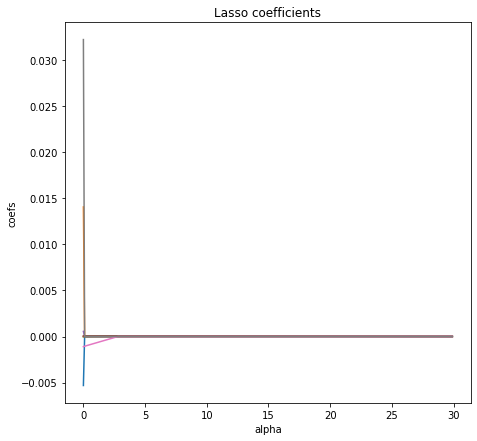

In [165]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 300 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 30, 0.1) 
for i in range(300):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

**e. Elastic net regression**

In [167]:
#importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [168]:
# Creating our linear regression model for the purpose of comparison
print(first_model) 

0.008867317670285398


This mean standard error score of 1.05 is our benchmark for determining 
if the elastic net model will be better or worst.

In [169]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [170]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

0.00896922318796848

In [173]:
from sklearn.linear_model import ElasticNet
X = df2_housing.iloc[:,1:-1].values
y = df2_housing.iloc[:,-1] .values
regr = ElasticNet(random_state=0)
regr.fit(X, y)
third_model = (mean_squared_error(y_true=y,y_pred=regr.predict(X)))
print(third_model)

0.009034546281239548


In [174]:
print(regr.coef_)

[-0.00000000e+00  0.00000000e+00 -1.84219137e-05  3.42917253e-06
  0.00000000e+00  7.47959915e-05 -9.10748885e-04  0.00000000e+00]


In [175]:
print(regr.intercept_)

-33.01321719574142


In [176]:
df2_housing.shape

(14929, 10)

In [177]:
print(regr.predict([[0,1,2,3,4,5,6,7]]))

[-33.01833427]


Based on  the models and computations above, we realised that the Mean Squared Errors (MSE)  for the models were as follows:

* Mean Squared Error: 0.00890193324527792 for multiple linear regression
* Pseudo R-squared: 0.02035 for quantile regression.
* Mean Squared Error: 0.008866260421402749 for ridge regression.
* lasso Mean Squared Error: 0.009339402808467095
* Elastic net Mean Squared Error: 0.009034546281239548

From the above metrics we realised that appropriate prediction model for the housing prices is the Multiple Linear Regression, a model that was used as the base comparison model.

# 10. Challenging the Solution

Based on the Predictive analysis further investigation and assessment is needed on Multiple Regression Model which would be provided to Hass Consulting Company 

#11. Follow up questions 


a). Did we have the right data?

b). Do we need other data to answer our question?

c). Did we have the right question?

d). Did we choose the right model?

#13.Recommendation

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.